# COGS 108 - Data Checkpoint

## Authors

**Eric Badilla:** Project administration, Conceptualization, Writing – original draft 

**Nishka Vaghela:** Background research, Writing – original draft 

**Niharika Sapre:** Software, visualization

**Renee Li:** Methodology, Writing – original draft 

**Jenny Fu:** Project administration, Software

## Research Question

How does the annual number of Computer and Information Sciences bachelor's degree graduates from accredited US universities compare to the number of entry-level software engineering and developer job postings in the US from 2020 to 2025? Specifically, is the numerical gap between these new degree earners and available beginner roles getting wider each year?

## Background and Prior Work

Computer science has been one of the fastest-growing academic disciplines in the U.S., driven by the perception of strong job prospects in software engineering and related roles. At the same time, structural changes in the technology labor market such as economic fluctuations, layoffs, and the growing role of automation, have reshaped job demand dynamics for early-career engineers. 

Educational Output of CS Graduates:

According to the National Student Clearinghouse Research Center, the number of U.S. students earning bachelor’s degrees in computer and information sciences more than doubled over the past decade, reaching over 112000 degrees (https://www.studentclearinghouse.org/nscblog/computer-science-has-highest-increase-in-bachelors-earners/) 

Moreover, data from the National Center for Education Statistics show that CS degree completions contributed significantly to the expanding pool of graduates in STEM fields, including computing (https://nces.ed.gov/programs/coe/indicator/cta) and computer science.

While no definitive dataset currently tracks both sides of the supply-demand equation (graduates and job openings) in exactly the same time series from 2020 to 2025, several prior studies offer useful context:

National Student Clearinghouse Research Center trend analysis shows the rapid increase in CS degree earners through 2022–23, which suggests a growing supply of potential software engineers.

Lightcast and hack training reports provide data on entry-level software engineer job postings, with evidence of growth in listings for early-career roles in the 2023-24 period.

Federal Reserve/St. Louis Fed labor posting indices track macro trends in job postings on platforms like Indeed, indicating that software development postings have declined relative to 2020.

Industry hiring analyses discuss how layoffs and economic pressures have led tech employers to prioritize experienced talent over entry-level hires in some cases, a factor that shapes demand relative to graduate supply.

Educational statistics from NCES and NSF provide multi-year degree award trends in STEM fields, showing sustained increases that feed into the pool of graduates seeking software engineering roles. These resources show us that the CS degree trends suggest rising supply, while labor market and hiring trend analyses show fluctuating demand.

The Computer Science labour market has been shaped by growing numbers of graduates, but fluctuations in entry-level software jobs. This growth reflects long-standing expectations that software engineering offers strong and stable employment opportunities. However, prior work suggests that labor market demand has not increased at the same pace. 


## Hypothesis


We predict that the numerical gap, calculated as the difference between the annual number of students earning Computer and Information Sciences bachelor's degrees from accredited US universities and the volume of entry-level software engineering job postings, is widening each year from 2020 to 2025. We expect this outcome because historical data suggests these specific degree completions are steadily rising, while the volume of available beginner roles has stagnated. Ultimately, our analysis aims to statistically quantify this disparity and explore whether broader tech industry shifts, such as AI advancements and macroeconomic conditions, are driving this divergence.

## Data

### Data overview

This project relies on two main datasets to compare the supply of Computer and Information Sciences bachelor’s degree graduates to the demand for entry-level software engineers in the United States from 2020 to 2025.

The first dataset (supply side) is from the National Center for Education Statistics (NCES) IPEDS Completions survey. This dataset includes the annual number of bachelor’s degrees awarded in Computer and Information Sciences (CIP code 11) from accredited U.S. institutions. Each row in this dataset represents degree completions for a particular year and level. The most important variable for this project is the total number of bachelor’s degrees awarded per year, which is a proxy for the total number of new CS graduates entering the workforce each year.

The second dataset (demand side) is a collection of LinkedIn job postings for software engineering positions in the United States. The raw dataset has 123,849 job postings with 31 variables, such as job title, company name, description, experience level, salary details, posting time, and location. After data cleaning and filtering to only include entry-level job postings between 2020 and 2025, paid in USD, and related to software engineering or development, the dataset has 772 job postings. The important variables are title, formatted_experience_level, listed_time (transformed to year), and normalized_salary, which is the standardized annual salary in USD.

Both datasets are in a tidy form, where each row corresponds to a single observation (a degree count or a job posting), and columns correspond to attributes. The datasets are merged at the annual level by aggregating job postings by year and comparing them to annual graduate counts. This enables us to calculate and analyze the annual difference between new graduates and entry-level job postings.

Although these datasets are a good approximation for the supply and demand trends, they also have their limitations. The job postings dataset is only an approximation of the publicly advertised jobs on LinkedIn and may not be a good representation of the overall hiring process. Also, not all CS graduates look for software engineering jobs, and not all entry-level software engineering jobs are consistently labeled.


In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [2]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress:   0%|          | 0/2 [00:00<?, ?it/s]
                                                                           

Successfully downloaded: airline-safety.csv



Overall Download Progress: 100%|██████████| 2/2 [00:00<00:00, 27.91it/s]

Successfully downloaded: bad-drivers.csv


### Data Scientist Job Market (Trends Dataset) 

https://www.kaggle.com/datasets/sl6149/data-scientist-job-market-in-the-us/data

This dataset available on Kaggle contains structured information from U.S.-based job postings for data science roles. The dataset includes variables such as job title, company name, job location, salary estimate, company rating, industry, job description, and required skills. One of the most important metrics is salary estimate, usually reported in U.S. dollars per year (USD/year). When provided as a range (for example, $90,000–$130,000), this reflects the lower and upper bounds of expected annual compensation. In the U.S. job market, entry-level data scientists often earn around $70,000–$95,000 annually, some roles range from $100,000–$130,000, and senior roles can exceed $150,000 depending on company and location. These salary figures represent gross annual pay before taxes and benefits.

Another metric is company rating, typically measured on a 1–5 scale. A rating near 5 suggests high employee satisfaction, while ratings closer to 3 may indicate mixed reviews. Location is also critical and usually recorded as city and state (for example, San Francisco, CA). This variable can be used to analyze geographic salary variation, since tech hubs such as California or New York often offer higher nominal salaries due to higher costs of living. The dataset may also include categorical variables like industry and sector, which help contextualize where data scientists are employed (for example, technology, healthcare, finance). 

However, there are several potential concerns with this dataset. First, it is likely based on online job postings, meaning it reflects advertised salaries rather than confirmed compensation. Some listings may omit salary information or provide broad ranges, which might introduce some uncertainty. Second, the dataset may be biased toward companies that advertise on major job platforms, underrepresenting smaller firms or informal hiring channels. Third, job postings represent demand at a specific point in time, making the dataset sensitive to economic conditions (for example tech hiring booms). Finally, since job descriptions vary widely in wording and completeness, skill extraction from text may introduce inconsistencies or measurement error. Overall, while the dataset is valuable for understanding trends in the U.S. data science labor market, however there are some limitations to be considered before using the dataset. This dataset also provides valuable insights that will be beneficial while analyzing trends.


Shape: (6964, 5)

Columns:
 Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')
The dataset is already tidy as each row is a job posting and each column is a variable
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


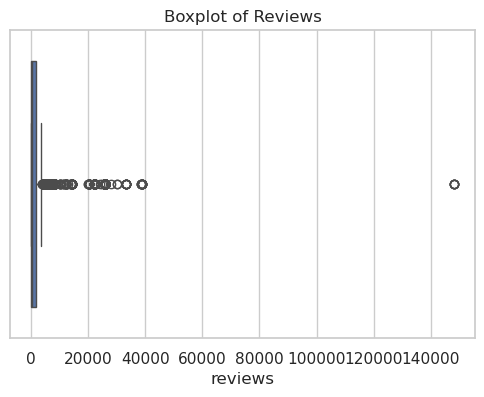

Number of outliers in 'reviews': 884
Blanks in position: 0
Blanks in company: 0
Blanks in description: 0
Blanks in reviews: 0
Blanks in location: 0
Saved interim and processed versions!
Final Shape: (6964, 7)
Reviews Summary Stats:
 count      5326.000000
mean       3179.089185
std        8448.515056
min           2.000000
25%          27.000000
50%         230.000000
75%        1578.000000
max      148114.000000
Name: reviews, dtype: float64

Top 10 Locations:
location
New York, NY         848
Seattle, WA          777
Cambridge, MA        694
Boston, MA           629
San Francisco, CA    564
Chicago, IL          471
San Diego, CA        412
Washington, DC       340
Mountain View, CA    277
Atlanta, GA          269
Name: count, dtype: int64

Top 10 Positions:
position
Data Scientist               351
Senior Data Scientist         96
Research Analyst              64
Data Engineer                 60
Machine Learning Engineer     56
Lead Data Scientist           31
Research Scientist     

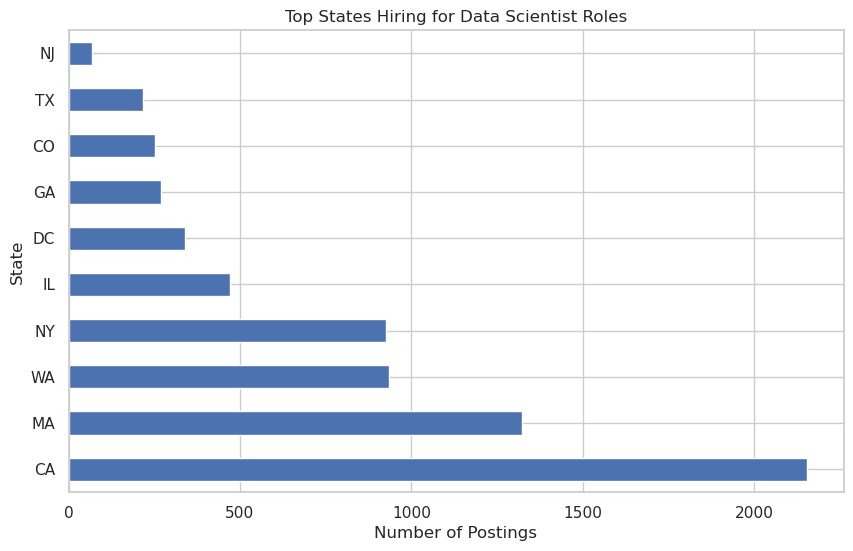

In [3]:
#import 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


# 1. load dataset 
df = pd.read_csv("data/00-raw/alldata.csv")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

df.head()

#2 make the dataset tidy or demonstrate that it was already tidy
print("The dataset is already tidy as each row is a job posting and each column is a variable")

#3 demonstrate the size of the dataset
df.shape
df.info()

#4 find out how much data is missing, where its missing, and if its missing at random or seems to have any systematic relationships in its missingness
missing_count  = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing %": missing_percent
}).sort_values(by="Missing %", ascending=False)

missing_df


missing_count  = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing %": missing_percent
}).sort_values(by="Missing %", ascending=False)

missing_df

#5 find and flag any outliers or suspicious entries
# Only numeric column is 'reviews'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['reviews'])
plt.title("Boxplot of Reviews")
plt.show()

# IQR method
Q1 = df['reviews'].quantile(0.25)
Q3 = df['reviews'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['reviews'] < lower) | (df['reviews'] > upper)]
print("Number of outliers in 'reviews':", outliers.shape[0])

#suspicious entries in the form of blank columns 
for col in df.columns:
    blank_count = (df[col].astype(str).str.strip() == '').sum()
    print(f"Blanks in {col}: {blank_count}")

# 6 clean the data or demonstrate that it was already clean. You may choose how to deal with missingness (dropna of fillna... how='any' or 'all') and you should justify your choice in some way
# Remove extra digits & clean city/state
df['location'] = df['location'].astype(str).str.replace(r'\d+', '', regex=True).str.strip()
df[['city','state']] = df['location'].str.split(',', expand=True)
df['state'] = df['state'].str.strip()


os.makedirs("data/01-interim", exist_ok=True)
os.makedirs("data/02-processed", exist_ok=True)

df.to_csv("data/01-interim/alldata_interim.csv", index=False)
df.to_csv("data/02-processed/alldata_clean.csv", index=False)

print("Saved interim and processed versions!")
print("Final Shape:", df.shape)


#7 summary statistics 
print("Reviews Summary Stats:\n", df['reviews'].describe())

print("\nTop 10 Locations:")
print(df['location'].value_counts().head(10))

print("\nTop 10 Positions:")
print(df['position'].value_counts().head(10))

#8 visualizations 

#states with the most data science roles 
plt.figure(figsize=(10,6))
df['state'].value_counts().head(10).plot(kind='barh')
plt.title("Top States Hiring for Data Scientist Roles")
plt.xlabel("Number of Postings")
plt.ylabel("State")
plt.show()


### LinkedIn Job Postings for Entry-Level Software Engineering in the U.S 

https://www.kaggle.com/datasets/arshkon/linkedin-job-postings

Each row in this dataset represents a single job posting, and each column represents a job attribute. The job listings were gathered via LinkedIn. The data is filtered for this project to only include entry-level software engineering jobs in the US that are posted between 2020 and 2025 and pay in USD. The dataset contains 772 job posts after cleaning.

A key variable is normalized_salary, which represents an annualized salary in USD. Salary listings can be hourly, monthly, or annual, thus it’s important to standardize them so that they can be compared across employment. The cleaned dataset shows a somewhat right-skewed distribution, with the median pay being roughly 105,635 dollars and the average entry-level salary being around $112,420.

The listed_time variable records when each job was posted as a Unix timestamp in milliseconds and is converted into calendar years. This makes it possible to examine trends in entry-level job postings from 2020 to 2025 on an annual basis. In order to identify entry-level positions, other pertinent factors include job title, company, location, work type (on-site or remote), and experience level. All things considered, the need for entry-level software engineers is proxied by this statistic.

However, only jobs advertised on LinkedIn are included in this dataset. Positions filled through internal hiring, college recruiting, or referrals are not, which could result in an underrepresentation of the overall demand for jobs. Many job posts lack wage information, and organizations that reveal pay may differ from those that don’t in a systematic way, which could skew salary estimations. Experience labels and job-title keywords are used to identify entry-level opportunities. This may result in the exclusion of certain suitable positions or the inclusion of ads with greater experience requirements. Furthermore, posting numbers may vary independently of actual employment because they represent employer intent rather than confirmed hires.

Despite these limitations, the dataset offers a reliable indicator of the demand for entry-level software engineering that is publicly advertised across time, which makes it appropriate for comparison with trends in graduate output in computer science.


In [4]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1. load the dataset 
df = pd.read_csv("data/00-raw/postings.csv")

# 2. the dataset is already tidy (Rows = job postings, Columns = job attributes, No nested structures)
df.info()

# 3. demonstrate the size of the dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# 4. find out how much data is missing, where its missing, and if its missing at random or seems to have any systematic relationships in its missingness
missing = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percentage
})

missing_summary.head(15)

# 5. find and flag any outliers or suspicious entries
df['listed_time'] = pd.to_datetime(df['listed_time'], unit='ms', errors='coerce')
df['year'] = df['listed_time'].dt.year

df['year'].value_counts().sort_index()

df[df['year'] < 2010]
df[df['year'] > 2025]

df['normalized_salary'].describe()


# 6. clean the data or demonstrate that it was already clean.  You may choose how to deal with missingness (dropna of fillna... how='any' or 'all') and you should justify your choice in some way
# Keep only valid years
df = df[(df['year'] >= 2020) & (df['year'] <= 2025)]
# Keep only US jobs
df = df[df['currency'] == 'USD']
# Keep only entry-level jobs
df = df[df['formatted_experience_level'].str.contains("Entry", case=False, na=False)]
# Keep only software engineering titles
df = df[df['title'].str.contains("Software|Engineer|Developer", case=False, na=False)]


# 7. You will load raw data from `data/00-raw/`, you will (optionally) write intermediate stages of your work to `data/01-interim` and you will write the final fully wrangled version of your data to `data/02-processed`
df.to_csv("data/02-processed/postings_processed.csv", index=False)

df.head()
# 8. summary statistics
summary_stats = pd.DataFrame({
    "Total Entry Level Swe Jobs": [len(df)],
    "Years Covered": [df["year"].min()],
    "Latest Year": [df["year"].max()],
    "Average Salary": [df["normalized_salary"].mean()],
    "Median Salary": [df["normalized_salary"].median()]
})
summary_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

,Total Entry Level Swe Jobs,Years Covered,Latest Year,Average Salary,Median Salary
0,772,2024,2024,112420.493089,105635.25


## Ethics

Instructions: Keep the contents of this cell. For each item on the checklist
-  put an X there if you've considered the item
-  IF THE ITEM IS RELEVANT place a short paragraph after the checklist item discussing the issue.
  
Items on this checklist are meant to provoke discussion among good-faith actors who take their ethical responsibilities seriously. Your teams will document these discussions and decisions for posterity using this section.  You don't have to solve these problems, you just have to acknowledge any potential harm no matter how unlikely.

Here is a [list of real world examples](https://deon.drivendata.org/examples/) for each item in the checklist that can refer to.

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### A. Data Collection
 - [X] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?

> Example of how to use the checkbox, and also of how you can put in a short paragraph that discusses the way this checklist item affects your project.  Remove this paragraph and the X in the checkbox before you fill this out for your project

 - [X] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
> We are concerned that the data itself may be biased or incomplete. Not all entry-level software engineering jobs are posted online, since some people get jobs through referrals, internal hiring, or campus recruiting that does not appear on job boards. Because of this, it is difficult to collect data that fully represents the true number of available jobs, which may affect the accuracy of the comparison.

 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [X] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
> The data used in this project is publicly available and does not include any private information. It is stored locally during the analysis, and basic care is taken to avoid accidentally changing or sharing the files. Because the data is low risk, no special security measures are needed.

 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

### C. Analysis
 - [X] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
> This project looks at overall numbers and trends, so it does not include personal experiences from recent graduates or employers. Because of this, the results may not fully explain why certain trends happen, and they should be understood as showing general patterns rather than individual experiences.

 - [X] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
> The datasets used in this analysis may introduce bias because they rely on broad categories and assumptions. Not all Computer Science graduates are looking for software engineering jobs, and not all jobs labeled as “entry-level” are actually accessible to new graduates. These mismatches can affect the comparison between supply and demand, so the results should be interpreted as approximate trends rather than exact measurements.

 - [X] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
> The results are presented in a way that avoids oversimplifying or exaggerating the data. Instead of focusing on single-year changes, the analysis looks at overall trends across multiple years to reduce the impact of short-term fluctuations. All figures and summaries are explained in context so readers understand what the data shows and what it does not show.

 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?
> The steps of the analysis, including data sources and processing methods, are documented so that the work can be checked or repeated by others if needed, which also helps maintain transparency and accountability.


### D. Modeling
 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [X] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
> The metrics used, such as the number of graduates and the number of entry-level job postings, were chosen because they directly relate to the research question. However, these metrics do not capture job quality or underemployment, which is a limitation.

 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [X] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?
> The final results clearly explain the limitations of the analysis, including data gaps and simplifying assumptions, so readers understand what the results do and do not show.

### E. Deployment
 - [X] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
> This analysis is based on data from a specific time period. If it were updated in the future, the data and methods would need to be checked again to make sure they still reflect current job market conditions.

 - [ ] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [X] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?
> There is a possibility that the results could be misunderstood or used to discourage students from majoring in Computer Science. To reduce this risk, the analysis emphasizes that it describes overall trends in the job market and does not predict individual outcomes or career success.


## Team Expectations 

* *We will communicate primarily through messages for quick updates and questions, and use Google Docs for longer-form work and progress tracking. We will meet once per week (virtually) and schedule additional meetings as needed*
* *We agree to communicate in a blunt but polite manner. Team members should feel comfortable expressing disagreement or concerns respectfully and constructively*
* *For major project decisions, we will aim for consensus. Otherwise, by majority vote. If in cases of time-sensitive decisions, the member will have to make a temporary decision at the moment and inform the group*
* *Tasks will be divided based on individual choices as they want. We will track tasks and progress using a shared document, so responsibilities and deadlines are visible to everyone.*
* *We will follow the agreed-upon project timeline and update it as needed. Team members are expected to complete assigned tasks by internal deadlines so the group can double-check.*
* *If a team member is struggling to complete a task, they should notify the group as early as possible, so we can work together to redistribute work temporarily or provide support. If a member consistently misses deadlines without communication, the group will address the issue directly and follow course guidelines if needed.*
* *All team members are expected to contribute equally in effort, communicate regularly, and respect each other’s time and commitments. We recognize that everyone has different strengths, schedules, and working styles, and we will support one another to ensure the project progresses smoothly.*

## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/4  |  1 PM | Review COGS 108 project expectations; brainstorm project ideas related to Big Tech hiring  | Determine best form of communication; Discuss and decide on final research question; discuss hypothesis; begin background research | 
| 2/11  |  10 AM |  Do background research on CS graduate trends and Big Tech hiring patterns | Identify potential datasets (education + job postings) and ethics; draft project proposal | 
| 2/18  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/25  | 6 PM  | Import & Wrangle Data; EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/4  | 12 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 3/11  | 12 PM  | Complete analysis; Draft results/conclusion/discussion| Discuss/edit full project |
| 3/18  | Before 11:59 PM  | double check assigned parts is completed and polished | Turn in Final Project & Group Project Surveys |
